In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

3.1 Warming Up Exercises - Basic Inspection and Exploration: Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(b) unique values of those columns.


In [ ]:
obj=df.select_dtypes(include='object').columns
obj

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for column in obj:
  data=df[column].unique()
  print(f'{column}:{data}')

job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'unknown' 'primary']
default:['no' 'yes']
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome:['unknown' 'failure' 'other' 'success']
y:['no' 'yes']


(c) check for the total number of null values in each column.

In [ ]:
for column in obj:
  null_value=df[column].isnull().sum()
  print(f'{column}:{null_value}')

job:0
marital:0
education:0
default:0
housing:0
loan:0
contact:0
month:0
poutcome:0
y:0


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”

In [ ]:
d=df.drop(columns=obj)
df_new=pd.DataFrame(d)
df_new.to_csv("banknumericdata.csv", index=False)

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
df=pd.read_csv("/content/banknumericdata.csv")
df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.


In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/medical_students_dataset.csv")
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [ ]:
df.shape

(200000, 13)

2. Check info of the DataFrame and identify column with missing (null) values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
column=df.columns
column

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [ ]:
for col in column:
  null_value=df[col].isnull().sum()
  null_percentage=df[col].isnull().sum()/len(df)*100
  print(f'{col}:{null_value}')
  print(f'{col}:{null_percentage}%')

Student ID:20000
Student ID:10.0%
Age:20000
Age:10.0%
Gender:20000
Gender:10.0%
Height:20000
Height:10.0%
Weight:20000
Weight:10.0%
Blood Type:20000
Blood Type:10.0%
BMI:20000
BMI:10.0%
Temperature:20000
Temperature:10.0%
Heart Rate:20000
Heart Rate:10.0%
Blood Pressure:20000
Blood Pressure:10.0%
Cholesterol:20000
Cholesterol:10.0%
Diabetes:20000
Diabetes:10.0%
Smoking:20000
Smoking:10.0%


3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.


In [3]:
import numpy as np

In [ ]:
for col in column:
  if col=="Student ID":
    df[col]=df[col].fillna(pd.Series(df.index+1, index=df.index))
  elif df[col].dtype=="object":
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.0,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.0,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,4.0,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.0,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996.0,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.0,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.0,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.0,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items. {Hint: dataset.duplicated.sum()}

In [ ]:
df.duplicated().sum()

np.int64(13728)

In [ ]:
df_new=df.drop_duplicates()
df_new

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.0,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.0,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,4.0,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.0,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996.0,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.0,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.0,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.0,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186272 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      186272 non-null  float64
 1   Age             186272 non-null  float64
 2   Gender          186272 non-null  object 
 3   Height          186272 non-null  float64
 4   Weight          186272 non-null  float64
 5   Blood Type      186272 non-null  object 
 6   BMI             186272 non-null  float64
 7   Temperature     186272 non-null  float64
 8   Heart Rate      186272 non-null  float64
 9   Blood Pressure  186272 non-null  float64
 10  Cholesterol     186272 non-null  float64
 11  Diabetes        186272 non-null  object 
 12  Smoking         186272 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.9+ MB


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?


In [ ]:
d=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Titanic-Dataset.csv")
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
column=d.columns
column

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.


In [72]:
df=pd.DataFrame(d.drop(columns=['PassengerId', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked']))
df

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000


In [73]:
df_new=df[(df["Pclass"]==1)].sort_values("Fare")
df_new

,Survived,Pclass,Name,Sex,Age,Fare
263,0,1,"Harrison, Mr. William",male,40.0,0.0000
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0.0000
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0000
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0.0000
815,0,1,"Fry, Mr. Richard",male,NaN,0.0000
...,...,...,...,...,...,...
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,263.0000
438,0,1,"Fortune, Mr. Mark",male,64.0,263.0000
258,1,1,"Ward, Miss. Anna",female,35.0,512.3292
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292


In [74]:
mean=df_new["Fare"].mean()
median=df_new["Fare"].median()
max=df_new["Fare"].max()
min=df_new["Fare"].min()
print("The mean fare of given data is",mean)
print("The median fare of given data is",median)
print("The maximum fare of given data is",max)
print("The minimum fare of given data is",min)

The mean fare of given data is 84.1546875
The median fare of given data is 60.287499999999994
The maximum fare of given data is 512.3292
The minimum fare of given data is 0.0


In [75]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
null_value_age= df_new['Age'].isnull().sum()
null_value_age

np.int64(30)

In [77]:
df=df_new.drop(df_new[df_new['Age'].isnull()].index)
df

,Survived,Pclass,Name,Sex,Age,Fare
263,0,1,"Harrison, Mr. William",male,40.0,0.0000
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0.0000
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0000
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,5.0000
662,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,25.5875
...,...,...,...,...,...,...
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,263.0000
438,0,1,"Fortune, Mr. Mark",male,64.0,263.0000
258,1,1,"Ward, Miss. Anna",female,35.0,512.3292
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292


In [78]:
null_value_age= df['Age'].isnull().sum()
null_value_age

np.int64(0)

Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka tion:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.


In [79]:
embarked_values=d['Embarked'].unique()
embarked_values

array(['S', 'C', 'Q', nan], dtype=object)

In [80]:
d = d.dropna(subset=['Embarked']).copy()
embark_encoding = pd.get_dummies(d, columns=['Embarked'], prefix='Embarked', dtype=int)
new_columns = [col for col in embark_encoding.columns if col.startswith('Embarked_')]
d[new_columns] = embark_encoding[new_columns]
d.drop('Embarked', axis=1)
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [81]:
d


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual ization to show how the survival distributions vary by gender.


In [83]:
g=d['Sex'].unique()
g

array(['male', 'female'], dtype=object)

In [85]:
mean_male=d[d['Sex']=='male']['Survived'].mean()
mean_female=d[d['Sex']=='female']['Survived'].mean()
print("The mean of male survived is ",mean_male)
print("The mean of female survived is ",mean_female)

The mean of male survived is  0.18890814558058924
The mean of female survived is  0.7403846153846154


Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).


<Axes: xlabel='Embarked'>

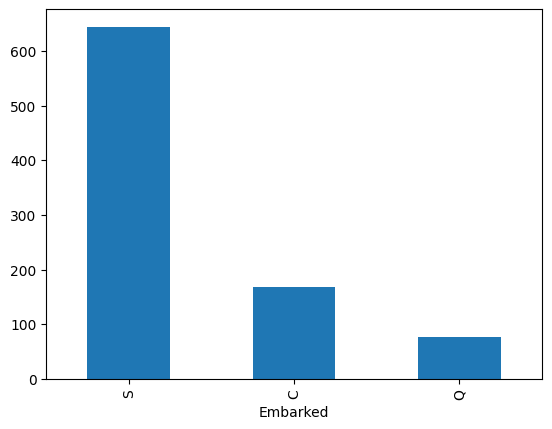

In [87]:
d["Embarked"].value_counts().plot(kind="bar")